## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name:
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
## Introduction

In [3]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline

# Being on with the data -->
Understanding the data plays a crucial role in any analysis.This project will use the Aviation data from kaggle dataset. For the Aviation data we will investigate various factors to get an idea of the business understanding:
1. Getting the dimension of the data
2. Understand the various variables in our data
3. Data Cleaning:
  1. Check for missing data
  2. Check for duplicates
  3. Format columns
  4. Drop columns
4. Data Visualization:
   1. Explore the various variables by using visuals and try to communicate
   2. Check for normality,outliers,spread,measure of tendency in the numeric variable

In [4]:
#Import the data
df= Aviation_Data= pd.read_csv('data/Aviation_Data.csv')


C:\Users\USER\AppData\Local\Temp\ipykernel_13264\1065713092.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df= Aviation_Data= pd.read_csv('data/Aviation_Data.csv')


In [5]:
# Check the dataframe
#View the first 5 values
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
# Get the shape/ dimensions of data
df.shape

(90348, 31)

In [7]:
# Data info
Aviation_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

The data composed of 2 data types dtypes: float64(5), object(26)

Presence of missing data

# Data cleaning

### Numerical Variables

In [8]:
# Numerical variables
numerical_df= df.select_dtypes(include='number').copy()
numerical_df.sample(6, random_state=42)

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
83358,1.0,1.0,0.0,0.0,0.0
1956,1.0,0.0,1.0,0.0,0.0
73015,1.0,1.0,0.0,0.0,0.0
87197,1.0,0.0,0.0,0.0,1.0
81246,1.0,0.0,0.0,0.0,2.0
43329,1.0,0.0,0.0,0.0,2.0


In [9]:
Aviation_Data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [10]:
# Check missing values
numerical_df.shape
numerical_df.isna().sum().sort_values(ascending= False)


Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Number.of.Engines          7543
Total.Uninjured            7371
dtype: int64

It is evident we have a lot of missing data. To approach this case, we can use the following methods:
1. Imputing missing data (median, mean, mode)
2. Ignore the missing data
3. Remove missing data

Deciding which method to use relies on the understanding of the data and the business analysis being performed on the data.

In [11]:
# Summary statistics
numerical_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [12]:
numerical_df['Number.of.Engines'].mean().__round__(0)

1.0

Something worth noting is how the variables are distributed there appears:
1. Outliers maybe present in the some of the variables
2. A hunce the variables are not normally distributed (check on the distribution)

On the matter of choosing to impute the variables at this point it is not advisable to use the meaasure of central tendency as they maybe misleading to support this let's perform some visualization and try to understand how the central tendency are distributed in the data

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


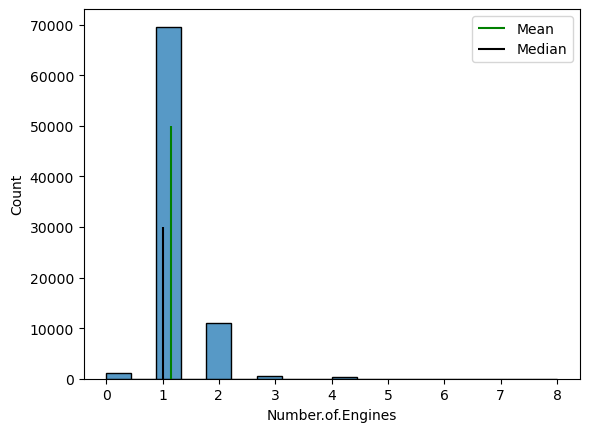

In [13]:
# Visualization
ax =sns.histplot(data=numerical_df, x="Number.of.Engines")
ax.vlines(x=numerical_df['Number.of.Engines'].mean(),color= 'green',ymax=50000,ymin=0,label='Mean')
ax.vlines(x=numerical_df['Number.of.Engines'].median(),color= 'black',ymax=30000,ymin=0,label='Median')
ax.legend()

The number of accidents occurence over the years is it there a trend in the data

In [14]:
# Mean_Median plot function
def Mean_Median_plot(dataset):
    """ 
    Input(datset): Takes in a dataset 
    Returns: Boxplots of the numerical variables in the dataset
    """
    # Ensure it is numeric
    dataset = dataset.select_dtypes(include ='number')
    for i,col in enumerate(dataset.columns):
        plt.figure(i)
        sns.histplot(data=dataset, x=col)
        # ax.vlines(x=numerical_df[col].mean(),color= 'green',ymax=50000,ymin=0,label='Mean')
        # ax.vlines(x=numerical_df[col].median(),color= 'black',ymax=30000,ymin=0,label='Median')
        # ax.legend()

## Conclusion
1. Since we are not going to impute the missing values or ignore them as they can affect the analysis we are going to drop them.
2. For the outliers it is worth considering that events were recorded and thus data points should not be removed from the data It also makes sense with the data as we expect the number of injuries/accidents to be fewer unless people won't be using airplanes as a form of transport

In [15]:
numerical_df.dropna(inplace= True)

In [16]:
numerical_df.shape

(69635, 5)

### Categorical Variables

Most of the variables in this dataset are objects

In [17]:
categorical_df = df.select_dtypes(include='object')
categorical_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,No,Reciprocating,NaN,NaN,Personal,NaN,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,No,Reciprocating,NaN,NaN,Personal,NaN,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,No,Reciprocating,NaN,NaN,Personal,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,No,Reciprocating,NaN,NaN,Personal,NaN,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,No,NaN,NaN,NaN,Personal,NaN,VMC,Approach,Probable Cause,16-04-1980


In [18]:
categorical_df.shape

(90348, 26)

In [19]:
# Check for missing data
categorical_df.isna().sum().sort_values(ascending=False)

Schedule                 77766
Air.carrier              73700
FAR.Description          58325
Aircraft.Category        58061
Longitude                55975
Latitude                 55966
Airport.Code             40216
Airport.Name             37644
Broad.phase.of.flight    28624
Publication.Date         16689
Engine.Type               8555
Report.Status             7843
Purpose.of.flight         7651
Weather.Condition         5951
Aircraft.damage           4653
Registration.Number       2841
Injury.Severity           2459
Country                   1685
Amateur.Built             1561
Model                     1551
Make                      1522
Location                  1511
Event.Date                1459
Accident.Number           1459
Event.Id                  1459
Investigation.Type           0
dtype: int64

In [20]:

# Drop columns that have missing values more than 30% of the data 
categorical_df.drop(['Schedule','Air.carrier','FAR.Description',
                     'Longitude','Latitude',
                     'Airport.Code','Airport.Name'],axis =1,inplace=True)

In [21]:
categorical_df.shape

(90348, 19)

Most of the variables have missing data except for "Investigation Type". Based on the objects we can partion the data objects into various features.

**Aircraft features**: Make.Model, Amateur.Built, Aircraft.Category

**Accident features**: Weather.condition

In [22]:
# Using unique and value count methods to view some of the levels in the categorical variables
categorical_df['Investigation.Type'].unique()

categorical_df['Investigation.Type'].value_counts()
# Data cleaning is necessary for this variable as this is a binary data from

Investigation.Type
Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
13-09-2021        1
04-08-2021        1
05-08-2022        1
03-11-2020        1
06-01-2021        1
Name: count, Length: 71, dtype: int64

In [23]:
# Filter the data to only have the Accidents and Incidents
new_df= categorical_df[(categorical_df['Investigation.Type']=='Accident') |(categorical_df['Investigation.Type']=='Incident')]
new_df['Investigation.Type'].value_counts()

Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64

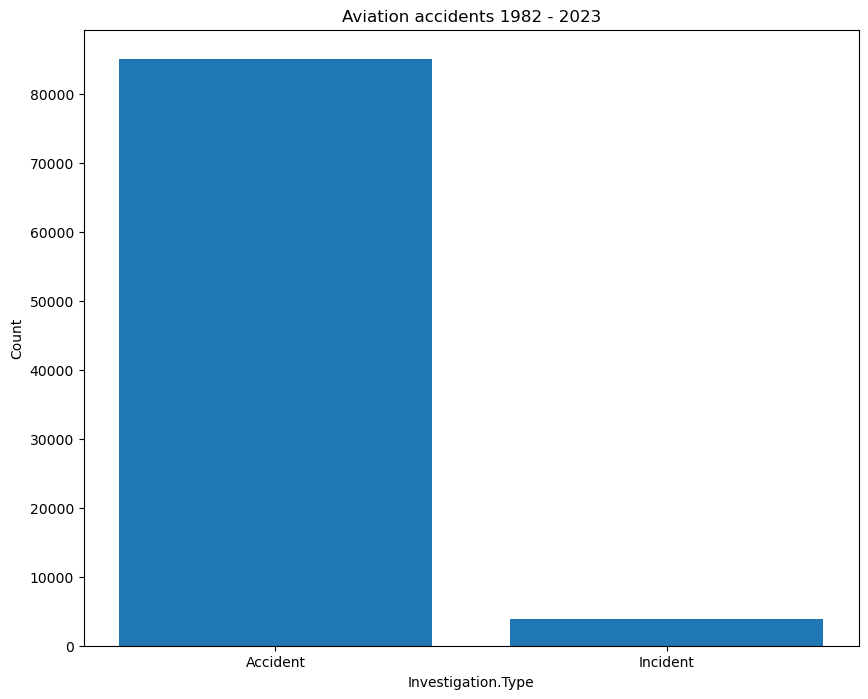

In [24]:
# Visualize
dty =new_df['Investigation.Type'].value_counts()
plt.figure(figsize=(10,8))
plt.bar(x=dty.index,height=dty.values)
plt.title('Aviation accidents 1982 - 2023')
plt.xlabel('Investigation.Type')
plt.ylabel('Count')
plt.show()

In [25]:
# 
categorical_df['Injury.Severity'].unique()

categorical_df['Injury.Severity'].value_counts().sort_values(ascending=False).head(10)
# Data cleaning would help by renaming all the Fatal levels to have three levels

Injury.Severity
Non-Fatal    67357
Fatal(1)      6167
Fatal         5262
Fatal(2)      3711
Incident      2219
Fatal(3)      1147
Fatal(4)       812
Fatal(5)       235
Minor          218
Serious        173
Name: count, dtype: int64

In [26]:
categorical_df['Aircraft.Category'].value_counts()
#Categorical_df

Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [27]:
categorical_df['Make'].unique()
categorical_df['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In [28]:
categorical_df['Engine.Type'].value_counts()
#Data cleaning combine the None and none

Engine.Type
Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

In [29]:
#Combine the None and NONE for the engine type
categorical_df.loc[:,'Engine.Type']= categorical_df['Engine.Type'].str.replace('NONE','None')

In [30]:
#Weather condition
categorical_df['Weather.Condition'].value_counts()
#Data cleaning to merge the unknown weather conditions
categorical_df.loc[:,'Weather.Condition']= categorical_df['Weather.Condition'].str.replace('UNK','Unk')

categorical_df['Weather.Condition'].value_counts()

Weather.Condition
VMC    77303
IMC     5976
Unk     1118
Name: count, dtype: int64

In [31]:
new_df['Broad.phase.of.flight'].value_counts()

Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [32]:
categorical_df['Report.Status'].value_counts()
# Text analysis
# loss engine power engine out "words"

Report.Status
Probable Cause                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        61754
Foreign                                                                                                                                                                                                                                                                                       

In [33]:
# Convert the Event.Date to a date variable
categorical_df['Event.Date'] =pd.to_datetime(categorical_df['Event.Date'])

In [34]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event.Id               88889 non-null  object        
 1   Investigation.Type     90348 non-null  object        
 2   Accident.Number        88889 non-null  object        
 3   Event.Date             88889 non-null  datetime64[ns]
 4   Location               88837 non-null  object        
 5   Country                88663 non-null  object        
 6   Injury.Severity        87889 non-null  object        
 7   Aircraft.damage        85695 non-null  object        
 8   Aircraft.Category      32287 non-null  object        
 9   Registration.Number    87507 non-null  object        
 10  Make                   88826 non-null  object        
 11  Model                  88797 non-null  object        
 12  Amateur.Built          88787 non-null  object        
 13  E

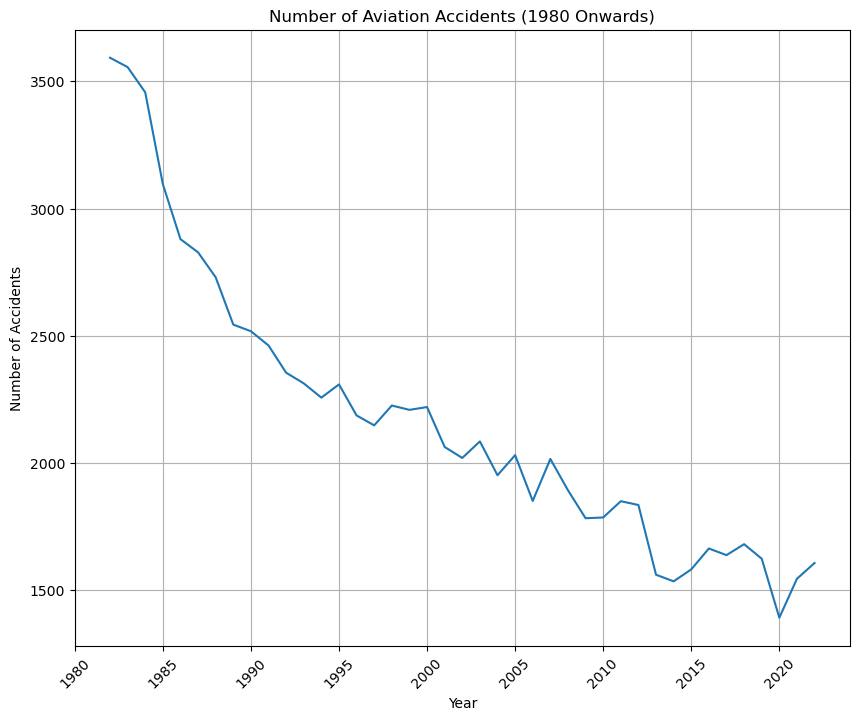

In [35]:
# Visualize the date variable to understand the trend in the accidents from  the years 1982 due to lack of sufficient data for the previous years
categorical_df['Year'] = categorical_df['Event.Date'].dt.year

categorical_df = categorical_df[categorical_df['Year']>1981]
# Check for missing data and remove
categorical_df =categorical_df.dropna(subset=['Year'])

# Get the value counts of the accidents
Accident_year = categorical_df['Year'].value_counts().sort_index()
Accident_year
#Plot the year data
plt.figure(figsize=(10,8))
plt.plot(Accident_year.index,Accident_year.values)
plt.title('Number of Aviation Accidents (1980 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [36]:
# Combine the numerical and categorical dataframes
Aviation_clean= numerical_df.join(categorical_df, how='inner')

In [37]:
# Get the shape of the data
Aviation_clean.shape

(69631, 25)

# Exploratory Data Analysis & Visualization
For this section we are interested in seeking the patterns in our data that aims to give us insights into the data we are analysing:

1. Safety Records:
* Accident rates per aircraft model: How many accidents/incidents are associated with each model?
* Injury Severity: How many accidents result in serious or fatal injuries?
2. Flight Purpose: The dataset includes a column for "Purpose of flight" (e.g., personal, business, instructional).This will help differentiate between aircraft used for private versus commercial purposes
3. What are the routes/Airports/Area that have terrible weather condition and can reveal which aircraft perform better under certain weather conditions.
4. Based on the report.status what type of engines/make/model had engine failures
5. Phases of Flight: The column "Broad phase of flight" will help identify during which flight phase (e.g., takeoff, cruise, landing) accidents tend to occur for different aircraft
6. The columns for "Make" and "Model" will allow us to determine which specific aircraft manufacturers and models have better safety records.

In [38]:
print(Aviation_clean['Country'].value_counts())
# Since most of the accidents are occuring in the United States we can filter the data
Aviation_clean = Aviation_clean[Aviation_clean['Country']=='United States']

Country
United States       67379
Brazil                154
Bahamas               128
Mexico                112
Canada                 93
                    ...  
Chad                    1
Cayenne                 1
Solomon Islands         1
Yemen                   1
French Polynesia        1
Name: count, Length: 157, dtype: int64


In [39]:
Aviation_clean.Country.value_counts()

Country
United States    67379
Name: count, dtype: int64

In [40]:
# 1.Accident rates per aircraft model: How many accidents/incidents are associated with each model?
Aviation_clean.Model.value_counts()
Aviation_clean['Investigation.Type'].value_counts()

# Check the first ten models with the highest accident/incident 
Model_Accident=Aviation_clean.groupby('Model').agg({'Investigation.Type':'count'}).sort_values(ascending=False,by ='Investigation.Type').head(10)

# Check the last ten models with the lowest accident/incident
Model_Accident_lowest=Aviation_clean.groupby('Model').agg({'Investigation.Type':'count'}).sort_values(ascending=False,by ='Investigation.Type').tail(10)

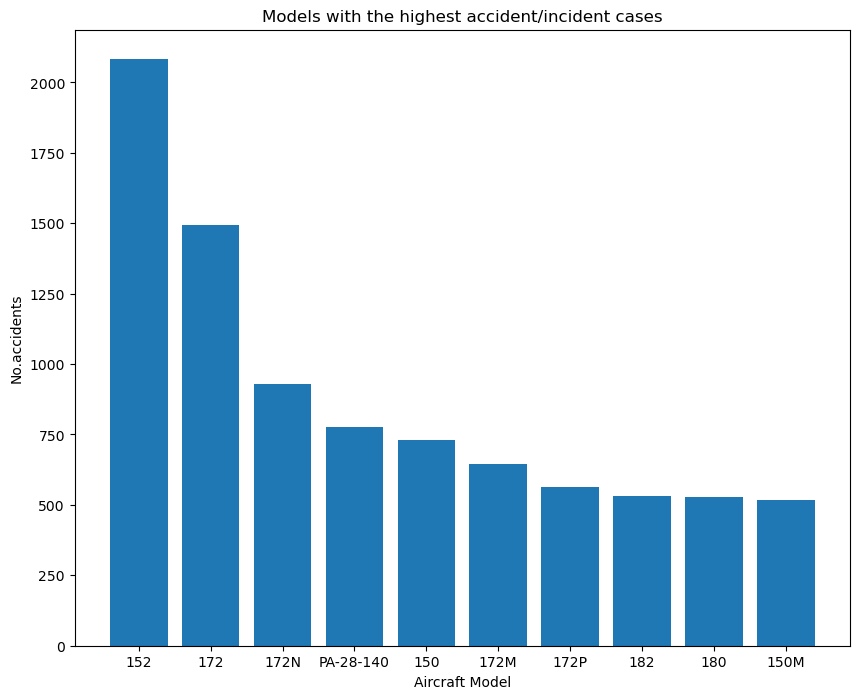

In [41]:
# let's visualize it
plt.figure(figsize=(10,8))
plt.bar(x=Model_Accident.index,height=Model_Accident['Investigation.Type'])
plt.title('Models with the highest accident/incident cases')
plt.ylabel('No.accidents')
plt.xlabel('Aircraft Model');

In [ ]:
# Injury Severity: How many accidents result in serious or fatal injuries?

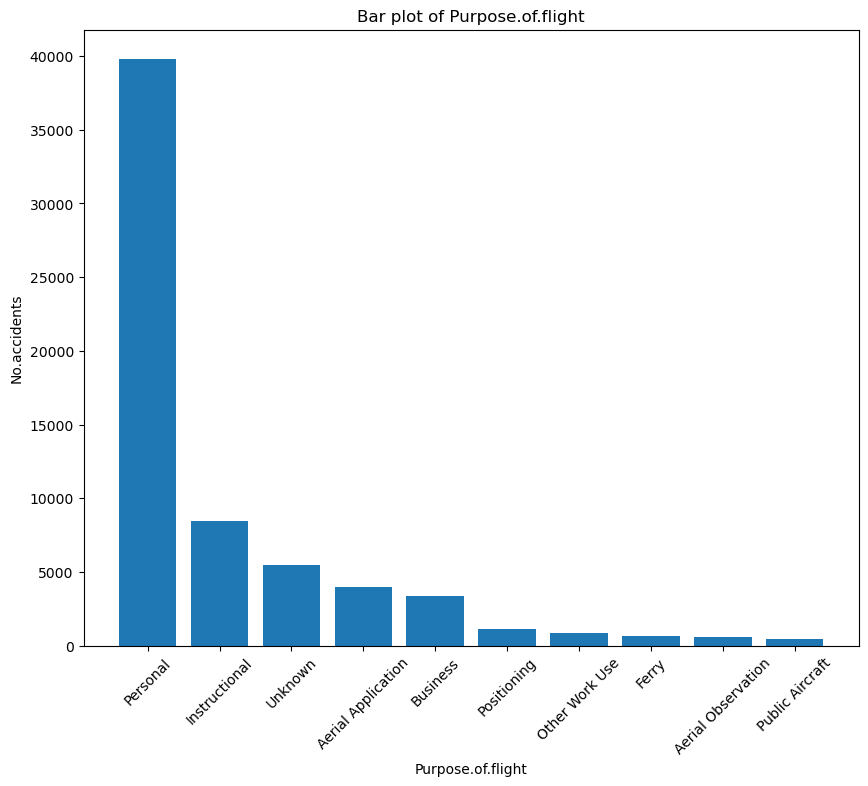

In [42]:
# "Purpose of flight"
top_ten_Purpose_flights =Aviation_clean['Purpose.of.flight'].value_counts().sort_values(ascending=False).head(10)

# create a function
def Bar_plot(dataset,column):
    plt.figure(figsize=(10,8))
    plt.bar(x=dataset.index,height=dataset.values)
    plt.title(f'Bar plot of {column}')
    plt.ylabel('No.accidents')
    plt.xlabel(f'{column}')
    plt.xticks(rotation =45);


col ='Purpose.of.flight'

Bar_plot(top_ten_Purpose_flights,col)
    
# top_ten_Purpose_flights.values

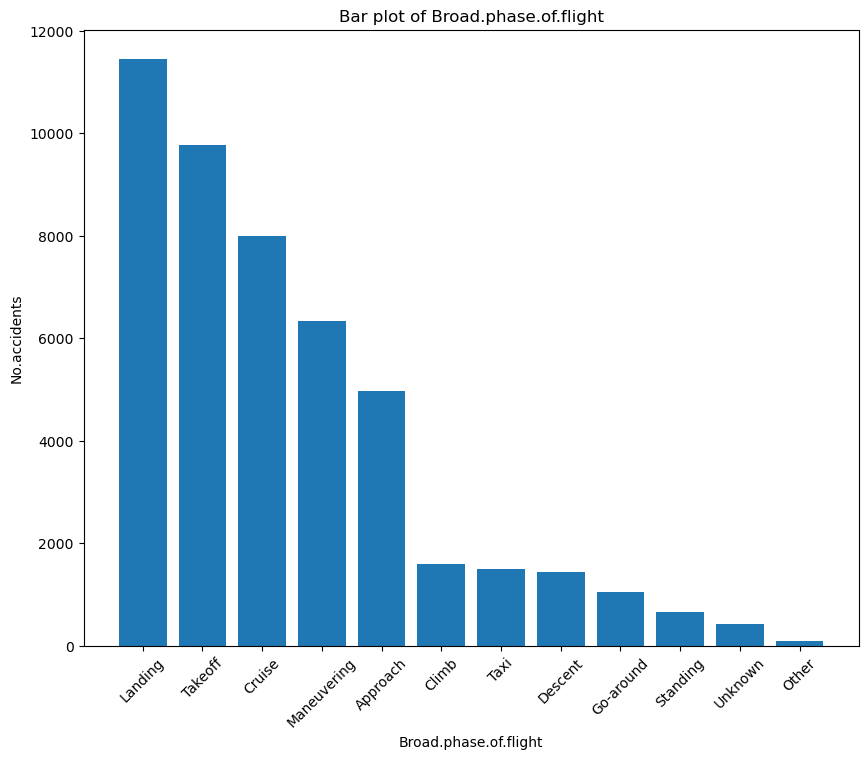

In [43]:
# 
Broad_flights =Aviation_clean['Broad.phase.of.flight'].value_counts()

Bar_plot(Broad_flights,'Broad.phase.of.flight')

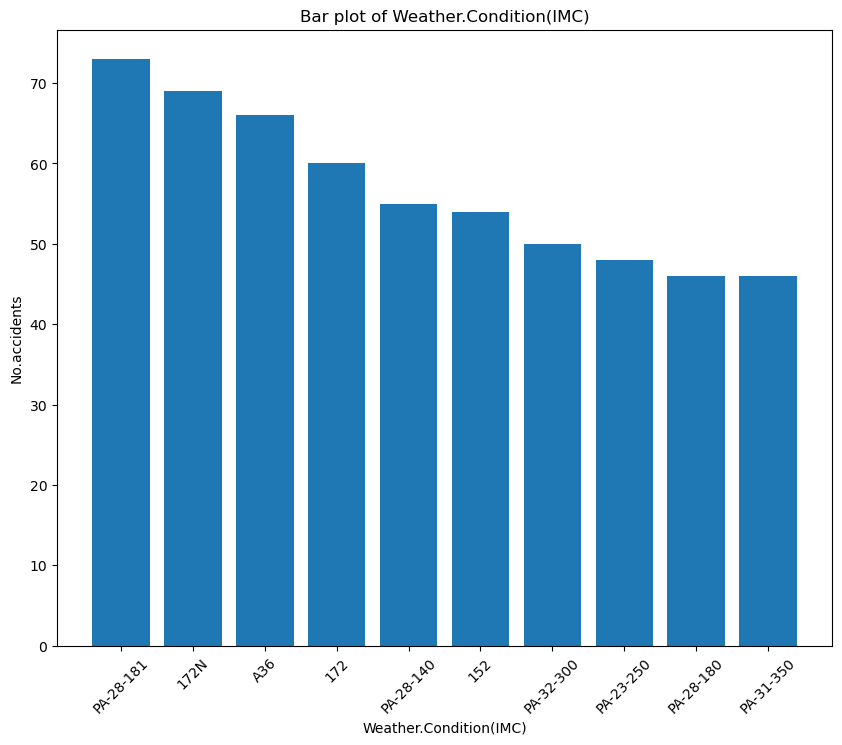

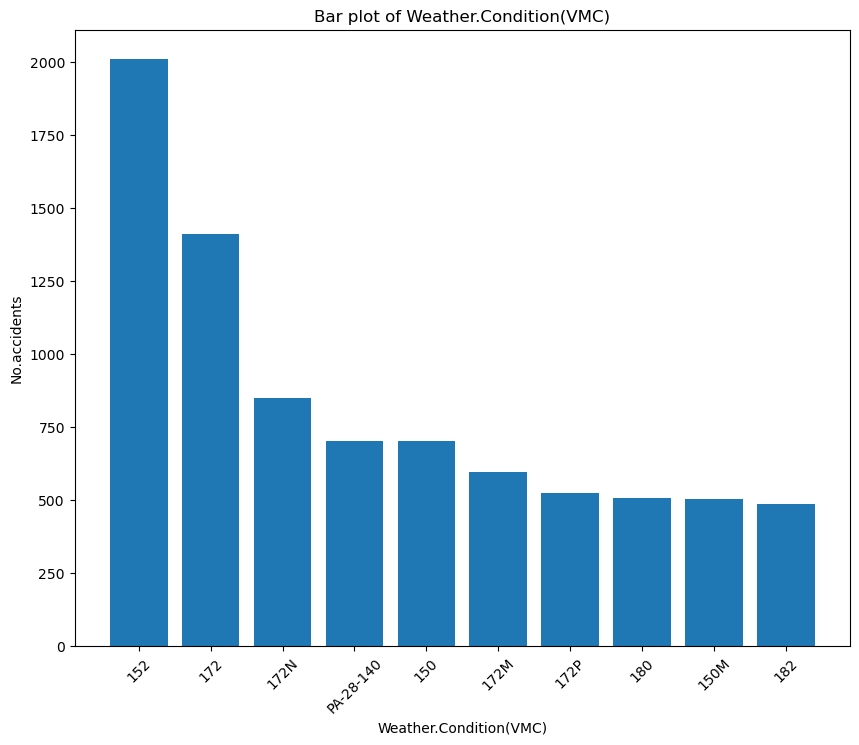

In [44]:
# Weather condition
Weather_data=Aviation_clean.groupby(['Weather.Condition','Model']).count()['Number.of.Engines'].sort_values(ascending=False)
Weather_data['VMC'].head(10)
Weather_data['IMC'].head(10)
# Weather_data
Bar_plot(Weather_data['IMC'].head(10),'Weather.Condition(IMC)')
Bar_plot(Weather_data['VMC'].head(10),'Weather.Condition(VMC)')

In [ ]:
# 6. Combine the make and model of the aircraft
# Aviation_clean['Make_model'] =

In [45]:
Aviation_clean.columns

Index(['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Event.Id',
       'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location',
       'Country', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Engine.Type',
       'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight',
       'Report.Status', 'Publication.Date', 'Year'],
      dtype='object')